# Simple MNIST Neural Network (NN) from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

**Author:** Saad Khurshid Qurashi

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([0, 9, 9, ..., 3, 5, 6])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 5 5 ... 3 3 5] [0 9 9 ... 3 5 6]
0.10378048780487804
Iteration:  10
[3 4 4 ... 4 0 8] [0 9 9 ... 3 5 6]
0.21017073170731707
Iteration:  20
[3 4 4 ... 4 0 8] [0 9 9 ... 3 5 6]
0.2972439024390244
Iteration:  30
[3 4 4 ... 3 0 8] [0 9 9 ... 3 5 6]
0.3962926829268293
Iteration:  40
[0 4 4 ... 3 0 8] [0 9 9 ... 3 5 6]
0.4722195121951219
Iteration:  50
[0 4 4 ... 3 0 8] [0 9 9 ... 3 5 6]
0.5220731707317073
Iteration:  60
[0 4 4 ... 3 5 8] [0 9 9 ... 3 5 6]
0.5619756097560976
Iteration:  70
[0 4 4 ... 3 5 8] [0 9 9 ... 3 5 6]
0.5956585365853658
Iteration:  80
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.6234634146341463
Iteration:  90
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.6469756097560976
Iteration:  100
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.6686585365853659
Iteration:  110
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.6865365853658537
Iteration:  120
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.7026341463414634
Iteration:  130
[0 4 4 ... 3 6 8] [0 9 9 ... 3 5 6]
0.7143658536585366
Iteration:  140

~85% accuracy on training set.

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [0]
Label:  0


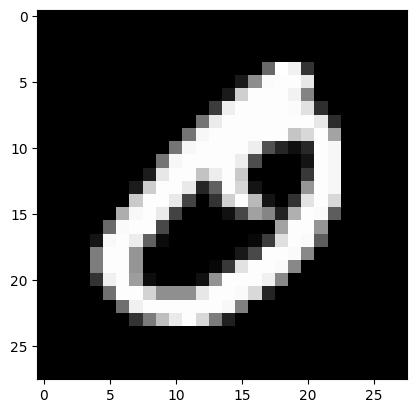

Prediction:  [9]
Label:  9


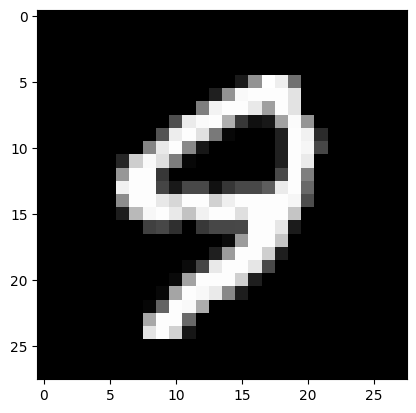

Prediction:  [8]
Label:  9


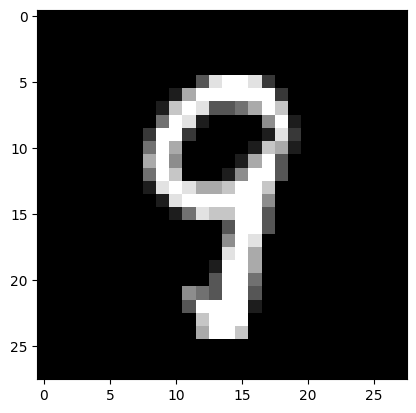

Prediction:  [2]
Label:  2


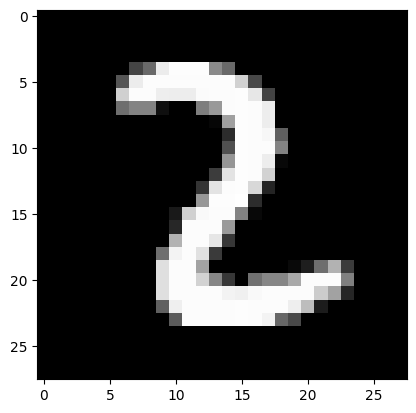

Prediction:  [2]
Label:  2


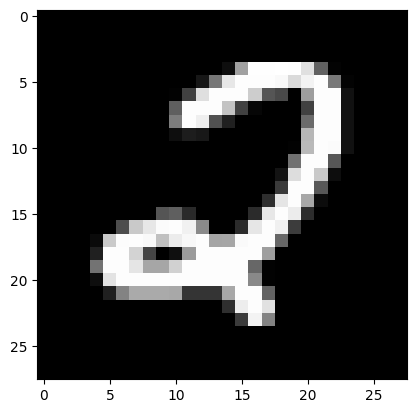

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 0 6 2 0 1 3 5 3 9 0 1 7 0 1 5 7 7 2 9 8 5 6 1 6 9 4 1 2 1 6 1 1 1 0 2 6
 6 0 4 4 1 8 9 1 1 4 5 9 8 1 9 3 8 4 4 9 1 6 8 0 1 0 8 7 6 9 8 9 3 0 2 3 8
 7 8 6 4 4 3 9 8 8 1 5 2 3 6 3 3 6 8 6 5 7 2 1 9 7 9 8 2 9 0 0 4 5 9 1 2 4
 6 2 6 4 9 8 6 4 7 6 6 1 2 3 4 3 3 2 1 2 0 7 0 9 7 8 2 6 2 5 0 0 2 0 3 2 3
 3 8 4 0 8 1 2 9 7 1 2 7 1 0 6 8 3 0 0 2 8 1 9 6 2 8 4 6 3 1 4 0 4 9 0 1 8
 1 4 9 1 8 9 8 9 8 5 7 3 5 6 3 1 6 7 4 4 8 8 3 1 8 3 9 7 0 3 3 4 4 3 9 5 3
 2 4 9 0 9 6 8 3 7 7 9 6 5 8 3 5 8 5 6 6 5 2 4 6 7 9 2 2 9 9 1 1 4 5 4 6 6
 4 1 3 6 7 8 9 2 1 5 3 7 5 9 1 2 0 6 8 1 5 1 5 1 3 3 2 3 7 1 8 2 4 8 8 9 4
 3 3 0 5 1 2 1 0 0 0 2 3 8 2 3 7 6 7 1 8 8 8 0 6 6 4 9 1 4 9 5 1 4 8 0 9 2
 5 9 8 3 1 5 9 7 8 8 1 3 0 9 1 8 4 6 6 4 9 9 9 1 3 0 7 0 7 7 7 1 7 0 8 5 5
 6 1 6 7 2 6 3 6 0 3 1 2 4 7 4 8 1 8 8 1 2 8 0 2 3 2 9 9 3 6 6 0 7 3 2 8 4
 6 3 1 8 8 0 1 2 3 2 1 8 1 5 9 6 2 9 9 6 7 7 8 0 3 2 9 4 0 5 1 3 1 8 2 0 1
 6 6 3 8 1 7 8 0 1 0 7 7 6 1 1 4 6 1 3 4 8 7 6 4 1 5 9 5 4 1 9 0 4 8 8 1 4
 2 2 1 7 8 2 0 5 2 8 4 1 

np.float64(0.84)

Still 84% accuracy, so our model generalized from the training data pretty well.